In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.0)

In [49]:
gpu_data = pd.read_csv('gpu.csv', index_col=0)

(0.0018, 0.002)

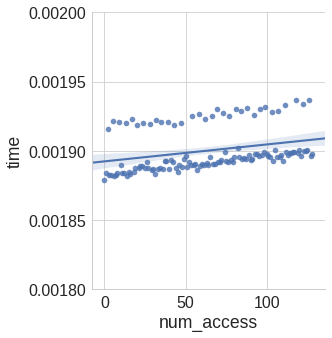

In [50]:
lm = sns.lmplot('num_access', 'time', gpu_data)
lm.axes[0, 0].set_ylim(1.8e-3, 2e-3)

In [51]:
result = sm.ols(formula="time ~ num_access", data=gpu_data).fit()
result.params

Intercept     1.892318e-03
num_access    1.223132e-07
dtype: float64

### Conclusion
Each l2 access takes 360 cycle. Close to what we have concluded for DRAM access. Also considering the starting point. The GPU taks 0.00085s to fulfill 4096 memory access, that is 200 cycles per requests. Which is much faster than what we have concluded that the GPU need 400 cycles to access main memory.

In [52]:
sim_data = pd.read_csv('sim.csv', index_col=0)

In [53]:
full_data = gpu_data.append(sim_data, ignore_index=True)

(0.0015, 0.002)

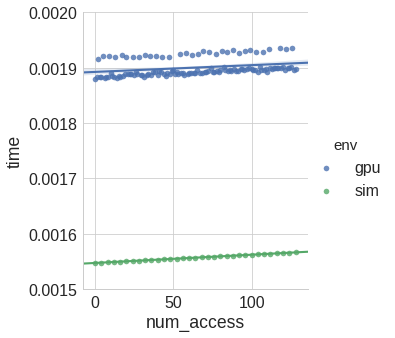

In [54]:
lm3 = sns.lmplot('num_access', 'time', full_data, hue='env')
lm3.axes[0, 0].set_ylim(1.5e-3, 2e-3)

In [55]:
result = sm.ols(formula="time ~ num_access", data=sim_data).fit()
result.params

Intercept     1.547398e-03
num_access    1.490324e-07
dtype: float64

### Best configuration

DRAM latency 300
L2 latency 100 + 3(dir lookup)
L1 Latency 1
